## Import Libraries for visualization

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import os
% matplotlib inline

In [2]:
#load data
working_dir = os.getcwd()
path = "/data/"
filename = 'combined_data.csv'
data = pd.read_csv(working_dir + path + filename, index_col=0)


In [3]:
df = data.copy(deep=True)

## Basic visualization for each feature
 - distribution plots, prices first, then volumn

Text(0.5,1,'Close')

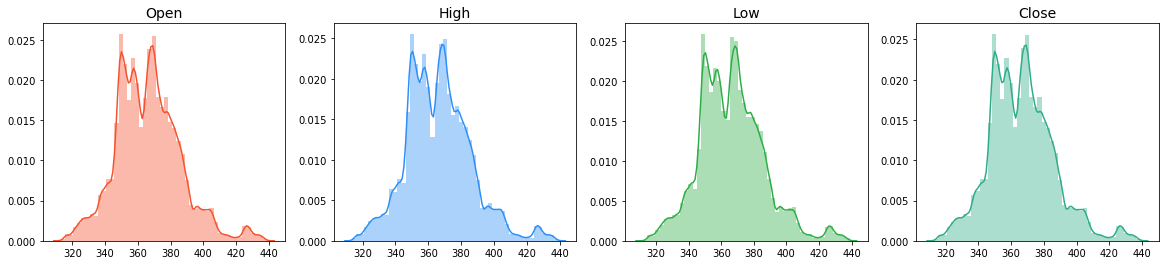

In [4]:
#exame the loan amount
import warnings
fig, ax = plt.subplots(1, 4, figsize=(20,4))

Open = df["Open"].values
High = df["High"].values
Low = df["Low"].values
Close = df["Close"].values

warnings.filterwarnings(action='ignore')


sns.distplot(Open, ax=ax[0], color="#F7522F")
ax[0].set_title("Open", fontsize=14)

sns.distplot(High, ax=ax[1], color="#2F8FF7")
ax[1].set_title("High", fontsize=14)

sns.distplot(Low, ax=ax[2], color="#2EAD46")
ax[2].set_title("Low", fontsize=14)

sns.distplot(Close, ax=ax[3], color="#2EAD88")
ax[3].set_title("Close", fontsize=14)




Text(0.5,1,'Volume')

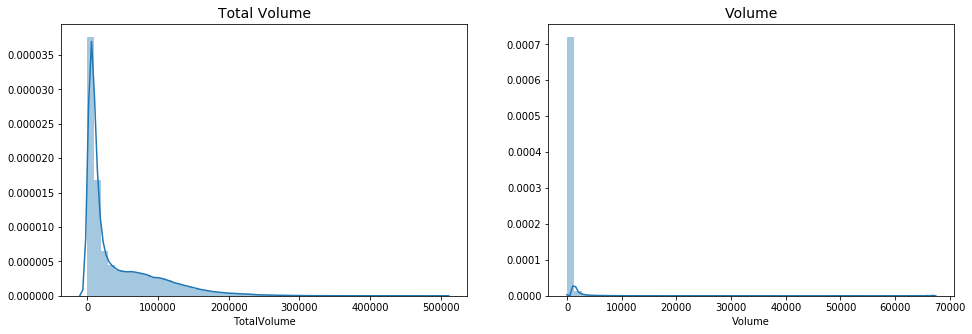

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(df['TotalVolume'], ax = ax[0])
ax[0].set_title("Total Volume", fontsize=14)

sns.distplot(df['Volume'], ax = ax[1])
ax[1].set_title("Volume", fontsize=14)


## Exam features yearly, monthly, and daily

In [6]:
dt_series = pd.to_datetime(df.index)
df['days'] = dt_series.date
df['years'] = dt_series.year
df['months'] = dt_series.month
df['year_month'] = dt_series.to_period('M')
df['time'] = dt_series.time

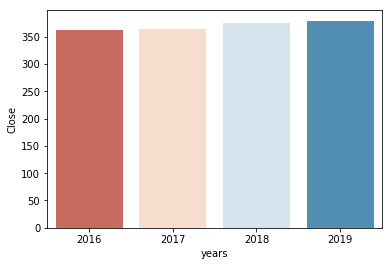

In [7]:
# basic year Closing price plot
sns.barplot('years', 'Close', data=df, palette='RdBu')

Text(0.5,1,'2018')

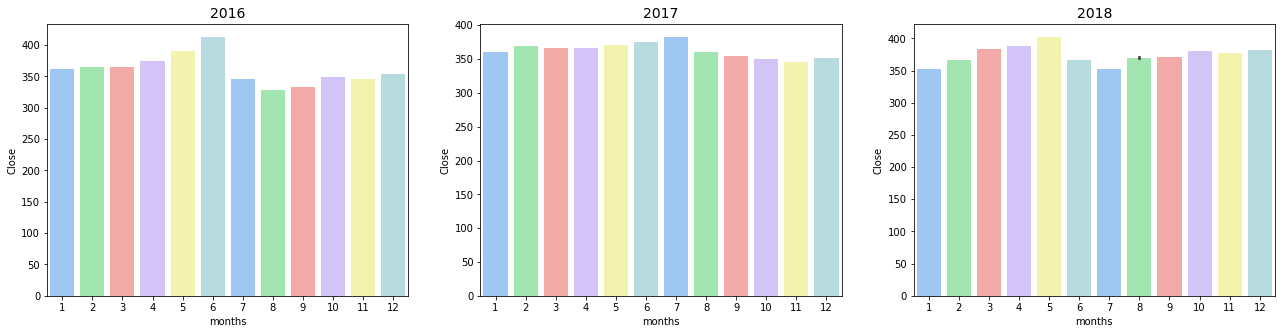

In [8]:
# plot close price of each month of 2016, 2017, and 2018

df_2018 = df[df['years'] == 2018 ]
df_2017 = df[df['years'] == 2017 ]
df_2016 = df[df['years'] == 2016 ]

fig, ax = plt.subplots(1, 3, figsize=(22,5))

sns.barplot('months', 'Close', data= df_2016, ax = ax[0], palette='pastel')
ax[0].set_title("2016", fontsize=14)

sns.barplot('months', 'Close', data= df_2017, ax = ax[1], palette='pastel')
ax[1].set_title("2017", fontsize = 14)

sns.barplot('months', 'Close', data= df_2018, ax = ax[2], palette='pastel')
ax[2].set_title("2018", fontsize = 14)

### Generate plot for daily total volume

In [10]:
print("There are {} trading days in the dataset".format(len(df.days.unique())))

There are 929 trading days in the dataset


In [11]:
'''    Trading hours:
        Sunday – Friday, 7:00 p.m. – 7:45 a.m. CT and 
        Monday – Friday, 8:30 a.m. – 1:20 p.m. CT
    Define the last day's night-time and today's day-time as today's trading hours
    '''
df.head(1)

,Open,High,Low,Close,TotalVolume,Volume,days,years,months,year_month,time
2016-01-03 19:01:00,359.5,360.0,359.0,359.75,1215,1215.0,2016-01-03,2016,1,2016-01,19:01:00


In [12]:
#Question: Data starts at 2016-01-03 19:01:00, the closing time should be 2016-01-04 07:45, while the total Volume is not 0 
# on 2016-01-04 08:31. 
df['2016-01-04 07:44':].head(5)

,Open,High,Low,Close,TotalVolume,Volume,days,years,months,year_month,time
2016-01-04 07:44:00,358.25,358.50,358.25,358.25,7899,55.0,2016-01-04,2016,1,2016-01,07:44:00
2016-01-04 07:45:00,358.00,358.25,358.00,358.00,7993,94.0,2016-01-04,2016,1,2016-01,07:45:00
2016-01-04 08:31:00,358.25,358.50,357.75,357.75,10186,2193.0,2016-01-04,2016,1,2016-01,08:31:00
2016-01-04 08:32:00,357.75,357.75,357.25,357.75,12454,2268.0,2016-01-04,2016,1,2016-01,08:32:00
2016-01-04 08:33:00,357.75,357.75,357.00,357.25,13816,1362.0,2016-01-04,2016,1,2016-01,08:33:00


In [13]:
# If define TotalVolume of a trading day to be the total volumn on 13:20 everyday
A = df[df['time'] == pd.Timestamp("13:20:00").time() ]

In [14]:
# Problem here!!!!!!!!!!!!!:
print("Length of A is only {}, while there are 929 trading days in the original data".format((len(A))))

Length of A is only 764, while there are 929 trading days in the original data


In [60]:
#Nevertheless, start plotting
total_volume = A.TotalVolume
tv_mean = total_volume.mean()
tv_std = total_volume.std()

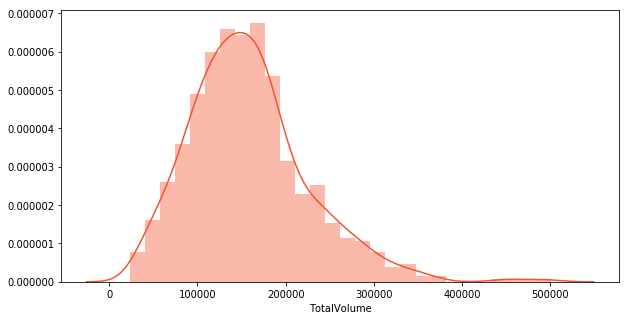

In [87]:
#exam distribution of total volume
plt.figure(figsize = (10,5))
_ = sns.distplot(total_volume,color="#F7522F")

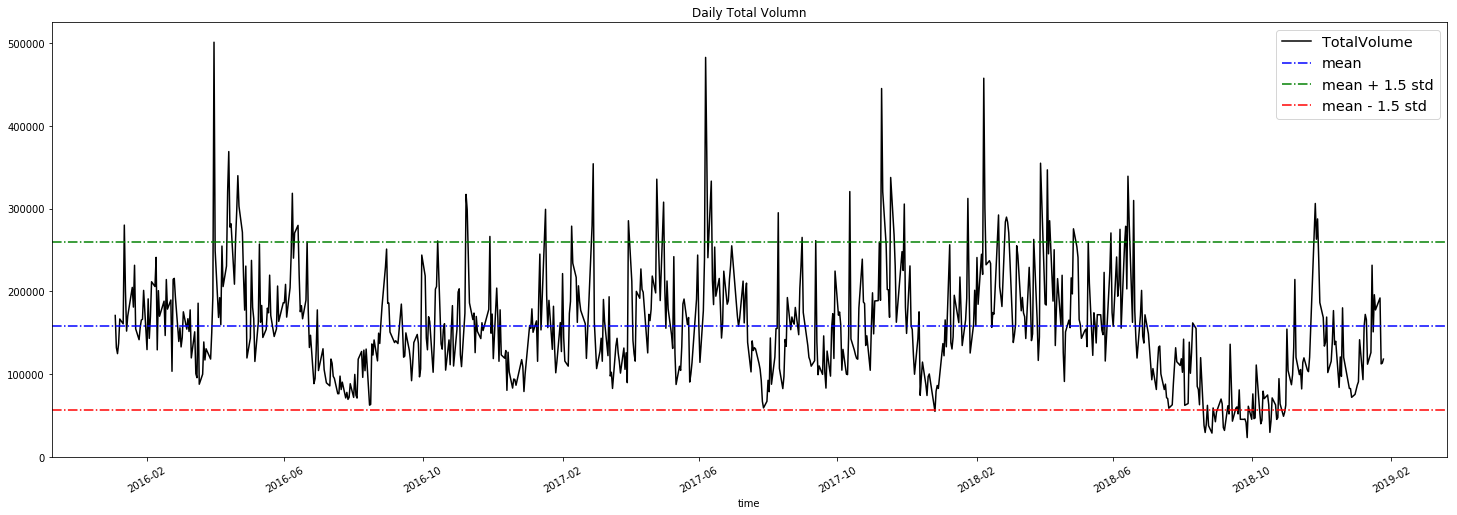

In [88]:
ax = A.plot('days','TotalVolume', kind = 'line', figsize = (25,8), title = "Daily Total Volumn", rot = 30, color = 'black')
ax.set_xlabel('time')
plt.axhline(tv_mean,color="blue",linestyle="-.",label="mean")
plt.axhline(tv_mean+1.5*tv_std,color="green",linestyle="-.",label="mean + 1.5 std")
plt.axhline(tv_mean-1.5*tv_std,color="red",linestyle="-.",label="mean - 1.5 std")
plt.legend(fontsize = 'x-large')
plt.show()


# tried to set xticks to show individual months, failed

## Plot for daily closing price and log daily closing price, not sure if this is useful

In [96]:
closing_price = A['Close']
log_cp = np.log(closing_price)

cp_mean = closing_price.mean()
cp_std = closing_price.std()

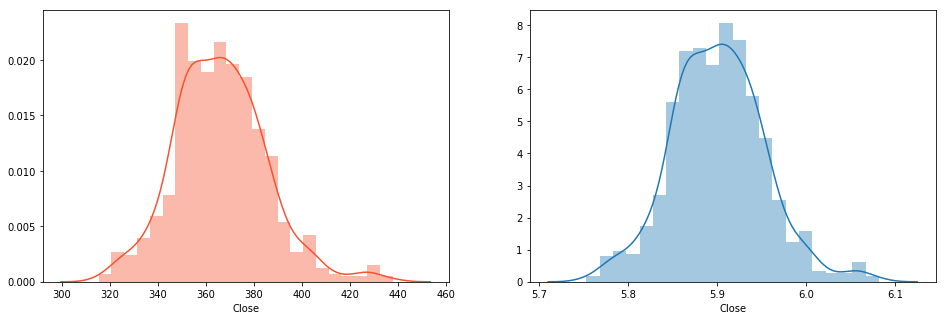

In [106]:
#exam distribution

fig, ax = plt.subplots(1, 2, figsize=(16,5))
sns.distplot(closing_price,ax = ax[0], color="#F7522F")
sns.distplot(log_cp ,ax = ax[1])

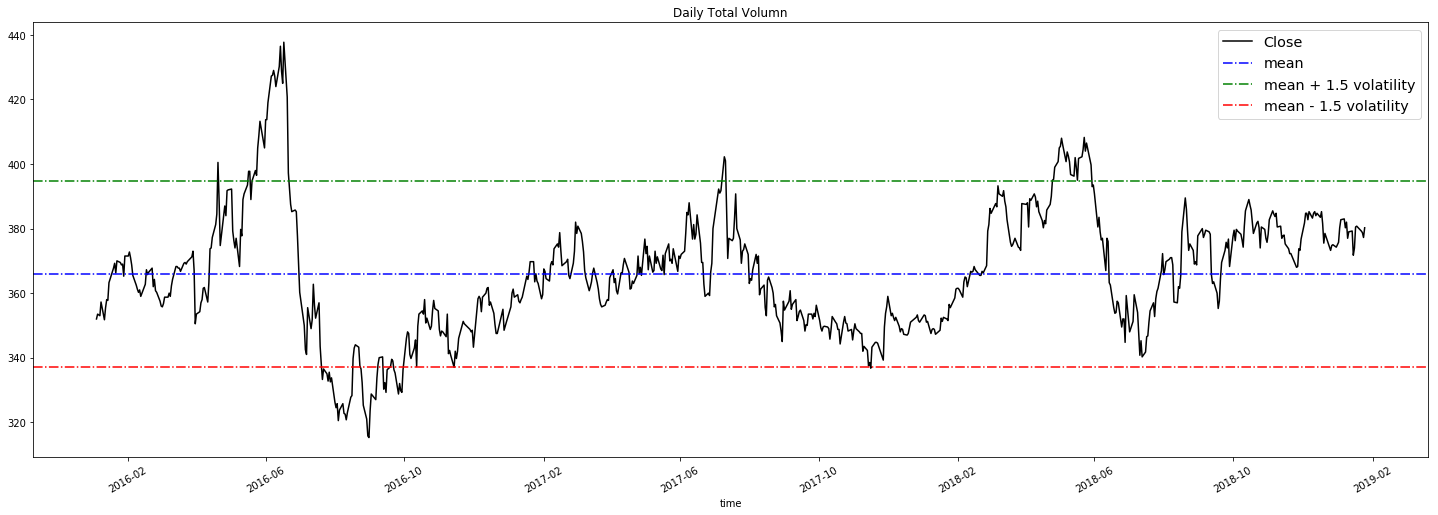

In [108]:
ax = A.plot('days','Close', kind = 'line', figsize = (25,8), title = "Daily Total Volumn", rot = 30, color = 'black')
ax.set_xlabel('time')
plt.axhline(cp_mean,color="blue",linestyle="-.",label="mean")
plt.axhline(cp_mean+1.5*cp_std,color="green",linestyle="-.",label="mean + 1.5 volatility")
plt.axhline(cp_mean-1.5*cp_std,color="red",linestyle="-.",label="mean - 1.5 volatility")
plt.legend(fontsize = 'x-large')
plt.show()


# tried to set xticks to show individual months, failed